### 1. hmsrest installation

This Jupyter notebook demostrate how to use the Rquests libray to invoke the services provided by the hmsrest plugin. The first step is to install the hmsrest plugin. To simplefy the process, a docker image was provided for users to test the hmsrest functionalities. First, users must have a Docker engine (e.g., Docker Desktop) installed in their PC. Then, users can issue the following two command lines to start a comtainer that runs the hmsrest services:

docker pull jannyarj/hmsrest:1.0

docker run -it -p 8182:8182 --name hmsrest_container jannyarj/hmsrest:1.0 


### 2. An example shows how to retrieve a parameter of hec-hms over the hmsrest

In [1]:
# import the requests library
import requests

# Send a request to retrieve the value of the "Initial Loss" parameter and save the response to the variable rs. 
# It is noted that "tenk/Tenk_1.basin/hash-Subbasin: 113-Initial Loss" in the URL define the route to the parameter.
rs = requests.get('http://localhost:8182/input/parameter/tenk/Tenk_1.basin/hash-Subbasin: 113-Initial Loss')
print(rs.text)
# As you can see the original value of this parameter is 1.3

{
  "     Initial Loss" : " 1.3"
}


--------------------------------
Users also can use other tools to invoke the services provided by hmsrest. Following is a screenshot of using the Advantaged REST Client (ARC)(https://www.advancedrestclient.com/) to perform the same work presented above. We provided a test file that users can import to ARC to test the functionalities of hmsrest presented in this notebook. The [test file](./arc-data-export-hmsrest.json) is available on this project's repository along with this notebook.

![retrieve parameter value](./Parameter_Retrieving.jpg)

### 3. An example shows how to change a parameter of hec-hms over the hmsrest

In [3]:
# import the requests library
import requests

# Use the post method to update  the value of the "Initial Loss" parameter and save the response to the variable rs. 
# It is noted that "tenk/Tenk_1.basin/hash-Subbasin: 113-Initial Loss: 1.4" in the URL define the route to the parameter and the value you want.
rs = requests.post('http://localhost:8182/input/parameter/tenk/Tenk_1.basin/hash-Subbasin: 113-Initial Loss: 1.4')
print(rs.text)
# After the change, users can retrive the value of the modified parameter
rs = requests.get('http://localhost:8182/input/parameter/tenk/Tenk_1.basin/hash-Subbasin: 113-Initial Loss')
print(rs.text)
# As you can see the value of this parameter was changed

success
{
  "     Initial Loss" : " 1.4"
}


--------------------------------
Change a parameter via the ARC tool

![Parameter_Editing.jpg](./Parameter_Editing.jpg)

### 4. An example to retieve time series data

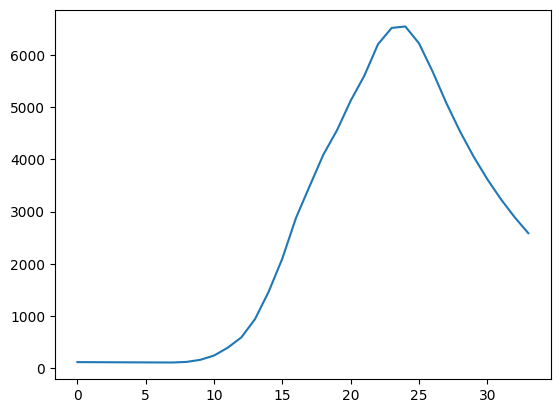

In [71]:
# import the requests, json, matplotlib, numpy and pandas libraries
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Retrieve time series data via the hmsrest plugin 

rs = requests.get('http://localhost:8182/input/timeseries/tenk/Jan_96_storm.dss/blank/113/FLOW/17JAN1996 - 19JAN1996/1HOUR/RUN:JAN 96 STORM/2400/0900')

# The folloing code handles format conversion
def custom_to_datetime(date):
    # If the date string do not have zero-paded than add one zero  
    if date[0]==' ':
        date[0]=0
    # If the time is 24, set it to 0 and increment day by 1
    if date[-5:-3] == '24':
        return pd.to_datetime(date[:-5], format = '%d %B %Y, ') + pd.Timedelta(days=1)
    else:
        return pd.to_datetime(date, format = '%d %B %Y, %H:%M')
data = json.loads(rs.text)

data=np.array(data)
df = [{'date': list(x.keys())[0],'value':list(x.values())[0]} for x in data]
df=pd.DataFrame(df)
df["value"] = pd.to_numeric(df["value"])
df['date'] = df['date'].apply(custom_to_datetime)  

# Create a figure showing the time series data.
fig, ax = plt.subplots()  
ax.plot(df["value"])




--------------------------------
Retrieve a time series via ARC

![Time_Series_Retrieving.jpg](./Time_Series_Retrieving.jpg)

### 5. Performing a model simulation

In [62]:
import requests

# Use the post method to perform model simulation.It is note the "Jan 96 storm" in the URL is the computation name.
rs = requests.post('http://localhost:8182/model/jython/tenk/tenk/Jan 96 storm')
print(rs.text)

Model run successfully.


--------------------------------
Performing a mosdel simulation via ARC

![Model_Execution_Jython.jpg](./Model_Execution_Jython.jpg)

### 6. Update time series; This functionality allow user to change the time series input and evalue the impact of changeing of input

In [70]:
import requests

# Use the put method to update time series data. It is note the data parameters provide information about the time window and the values to change.
rs = requests.put('http://localhost:8182/input/timeseries/tenk/Jan_96_storm.dss/blank/113/FLOW/01JAN1996 - 21JAN1996/1HOUR/RUN:JAN 96 STORM/',
                  data={"stime":"2400","etime":"0100","sday":"01JAN1996","eday":"02JAN1996","values":"44,55"}    )
print(rs.text)

# Verify if time series data had been changed
rs = requests.get('http://localhost:8182/input/timeseries/tenk/Jan_96_storm.dss/blank/113/FLOW/01JAN1996 - 02JAN1996/1HOUR/RUN:JAN 96 STORM/2400/0100')
print(rs.text)


Data successfully added.
[ {
  "1 January 1996, 24:00" : "44.0"
}, {
  "2 January 1996, 01:00" : "55.0"
} ]


--------------------------------
Update time series via ARC

![Time_Series_editing.jpg](./Time_Series_editing.jpg)